In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 3/CC.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 3/CC.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 3/CC'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 3/CC   
1    P:/CoxaAI/Sortering 3/CC   
2    P:/CoxaAI/Sortering 3/CC   
3    P:/CoxaAI/Sortering 3/CC   
4    P:/CoxaAI/Sortering 3/CC   
..                        ...   
197  P:/CoxaAI/Sortering 3/CC   
198  P:/CoxaAI/Sortering 3/CC   
199  P:/CoxaAI/Sortering 3/CC   
200  P:/CoxaAI/Sortering 3/CC   
201  P:/CoxaAI/Sortering 3/CC   

                                              filename parent_name  \
0             1.2.276.0.95.32501.20230203.134410.0.dcm  1-22113830   
1             1.2.276.0.95.32501.20230203.134410.0.dcm  1-22113830   
2             1.2.276.0.95.32501.20230203.135450.0.dcm  1-22113830   
3             1.2.276.0.95.32501.20230203.135450.0.dcm  1-22113830   
4    1.2.276.0.95.32373.1.20230202.124935.0.2.4076.dcm  1-22115512   
..                                                 ...         ...   
197  1.2.392.200036.9107.500.220.18951.20230210.112...  1-23014334   
198  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...  1-23014508   
199  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...  1-23014508   
200  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...  1-23014524   
201  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...  1-23014524   

                                             crop_name  ax0_min  ax0_max  \
0          1.2.276.0.95.32501.20230203.134410.0.dcm_h1     1979     2151   
1          1.2.276.0.95.32501.20230203.134410.0.dcm_h2     2004     2176   
2          1.2.276.0.95.32501.20230203.135450.0.dcm_h1      826     1010   
3          1.2.276.0.95.32501.20230203.135450.0.dcm_h2      845     1031   
4    1.2.276.0.95.32373.1.20230202.124935.0.2.4076....      746      906   
..                                                 ...      ...      ...   
197  1.2.392.200036.9107.500.220.18951.20230210.112...      613      770   
198  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...     1119     1307   
199  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...     1106     1293   
200  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...     1349     1537   
201  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...     1381     1564   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0       1245     1366    0.995571       False          2            CC  
1       1881     2007    0.990111       False          2            CC  
2       1250     1382    0.996939       False          2            CC  
3       1879     2013    0.969988       False          2            CC  
4        661      773    0.952573       False          2            CC  
..       ...      ...         ...         ...        ...           ...  
197     1232     1348    0.929935       False          2            CC  
198     1475     1615    0.949998       False          2            CC  
199      806      940    0.886035       False          2            CC  
200     1010     1145    0.999443       False          2            CC  
201     1671     1803    0.996741       False          2            CC  

[202 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([32, 62, 123], dtype='int64')

Note that there are 3 uncertain cases

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

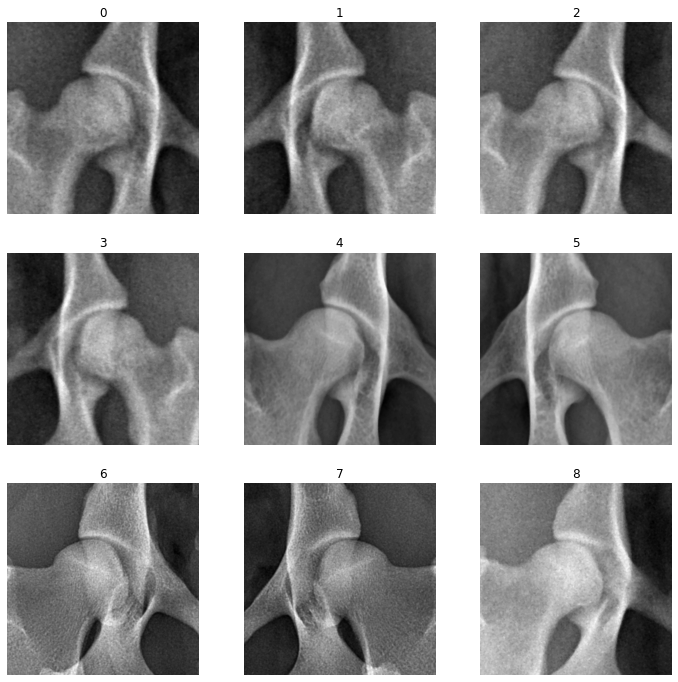

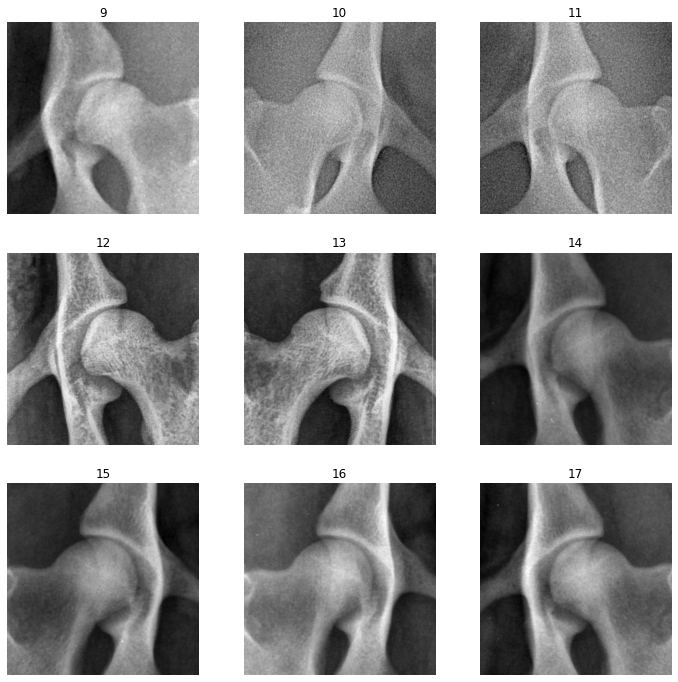

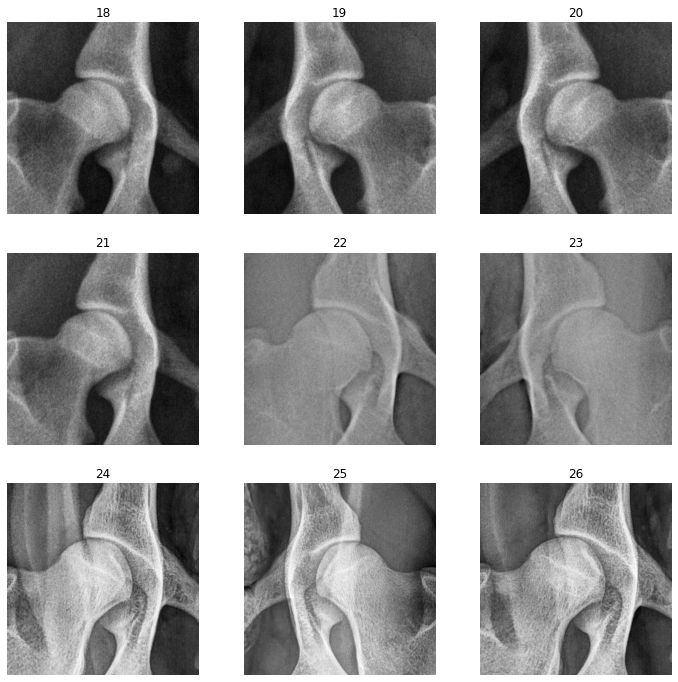

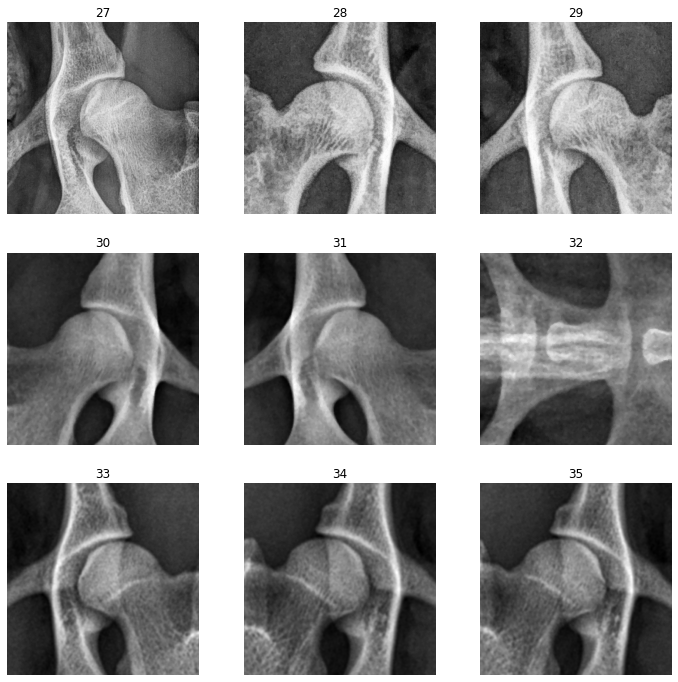

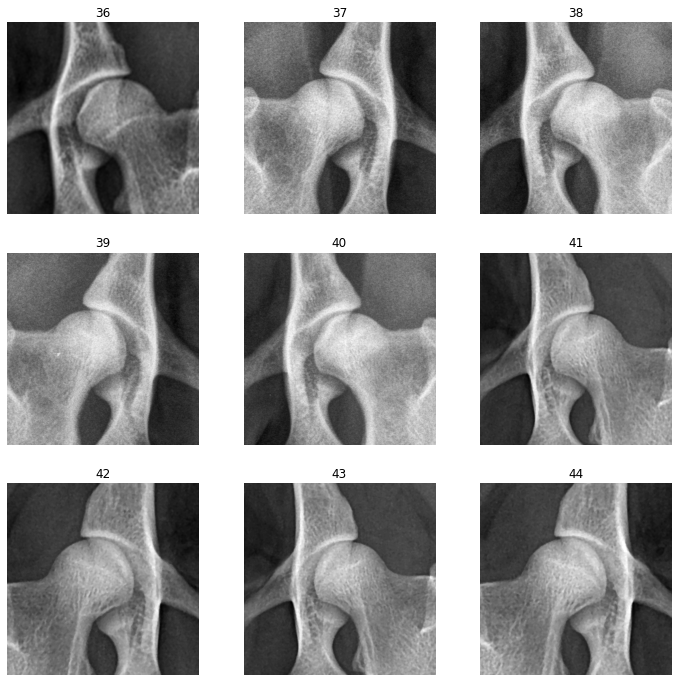

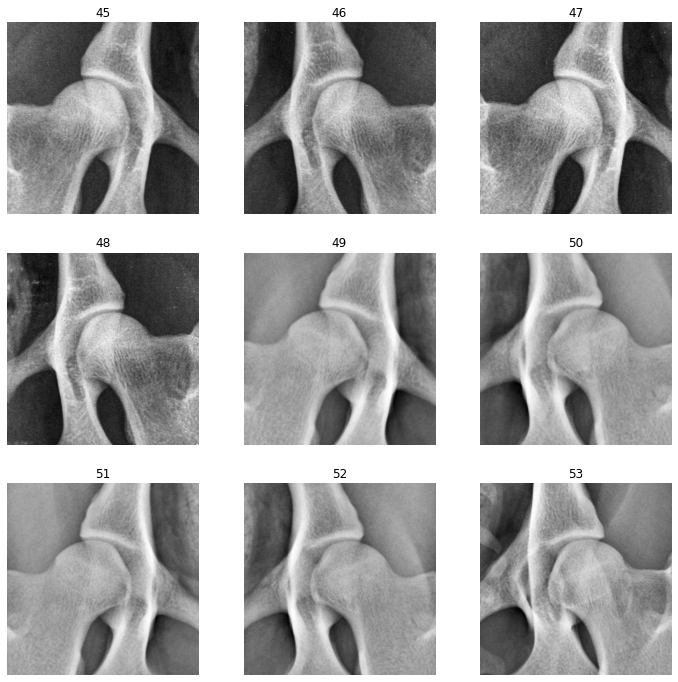

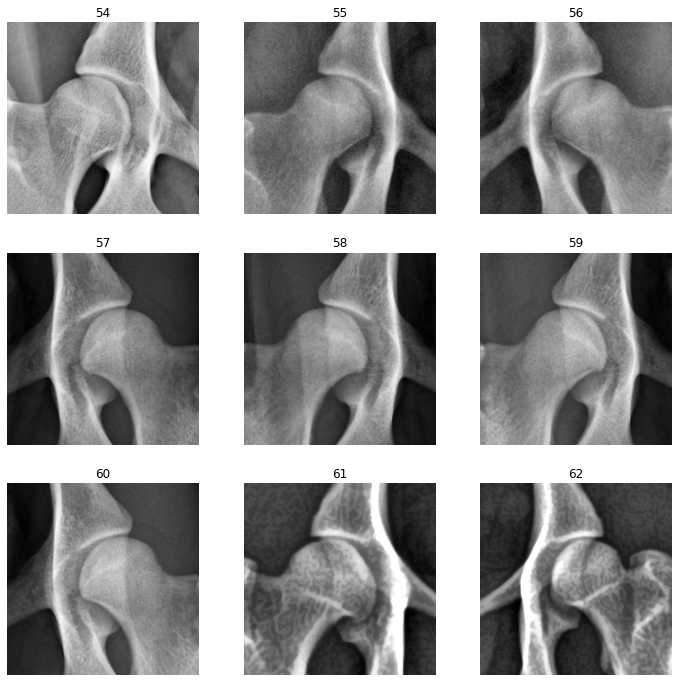

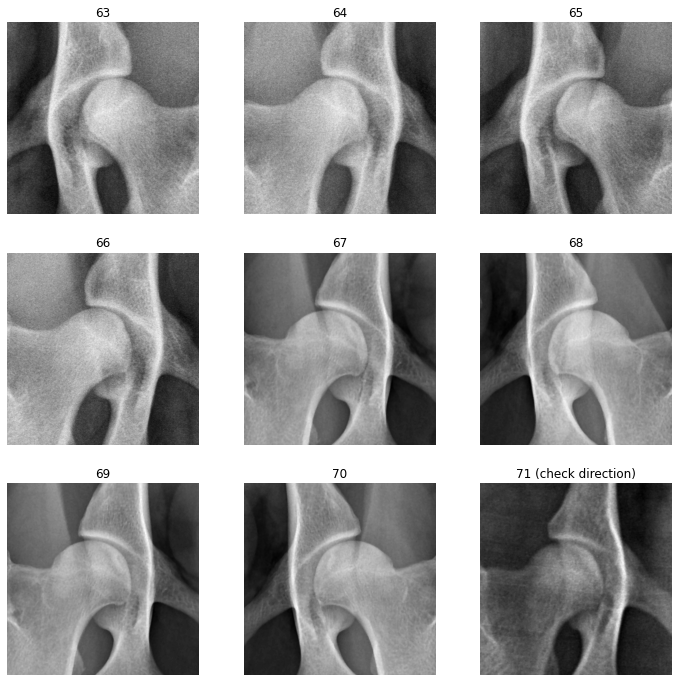

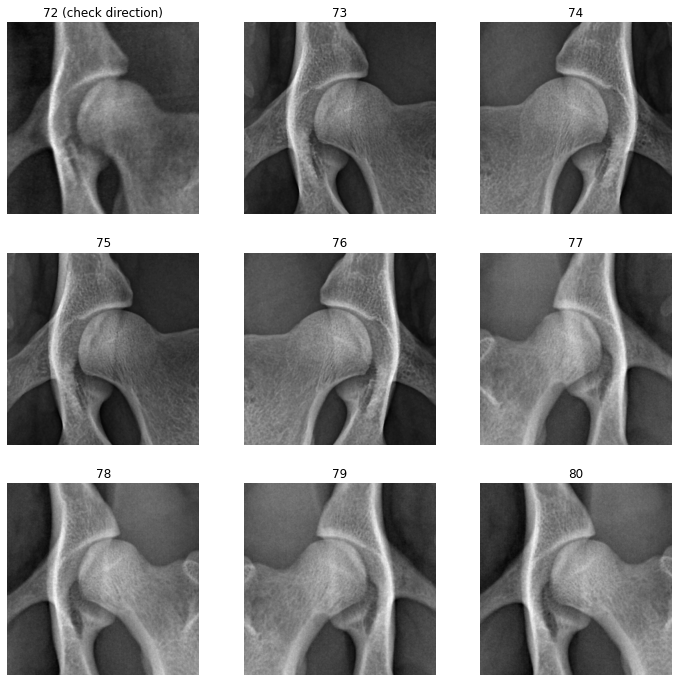

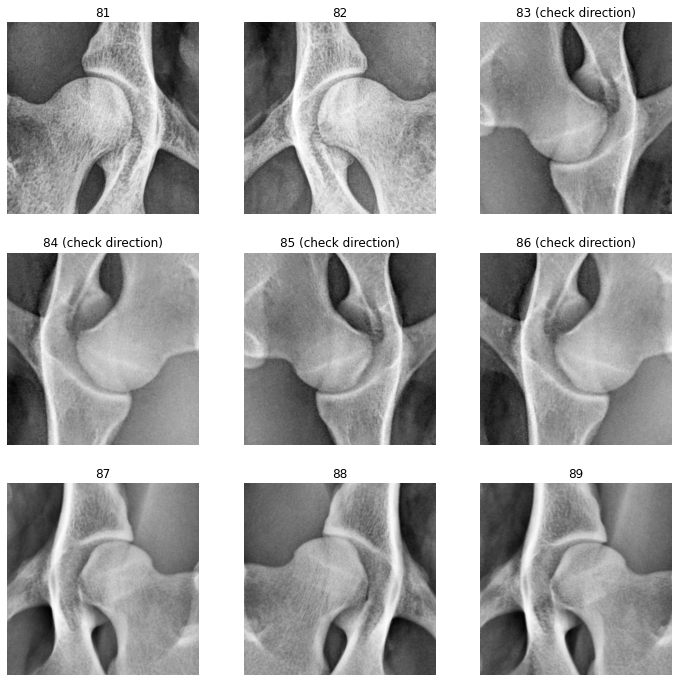

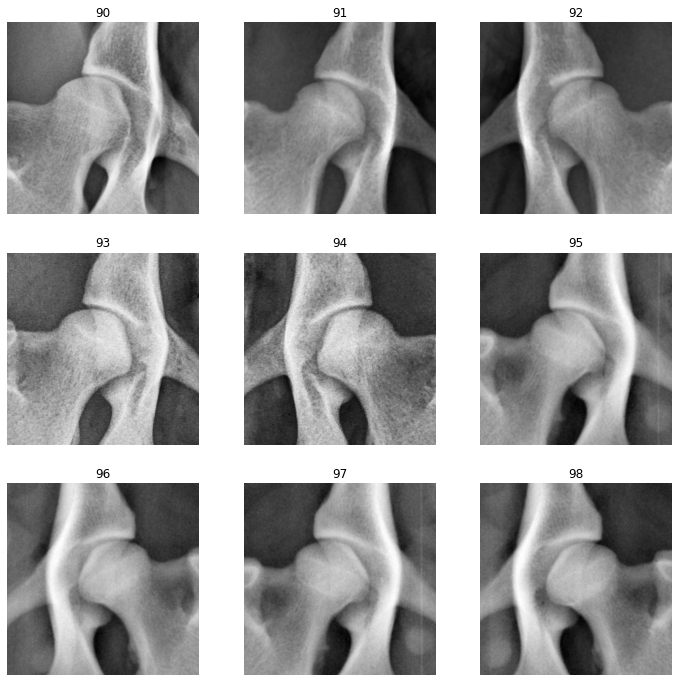

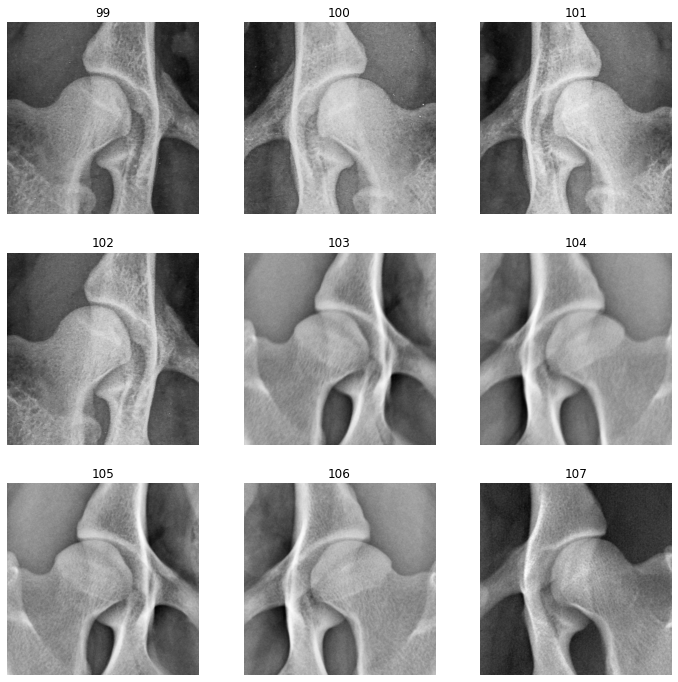

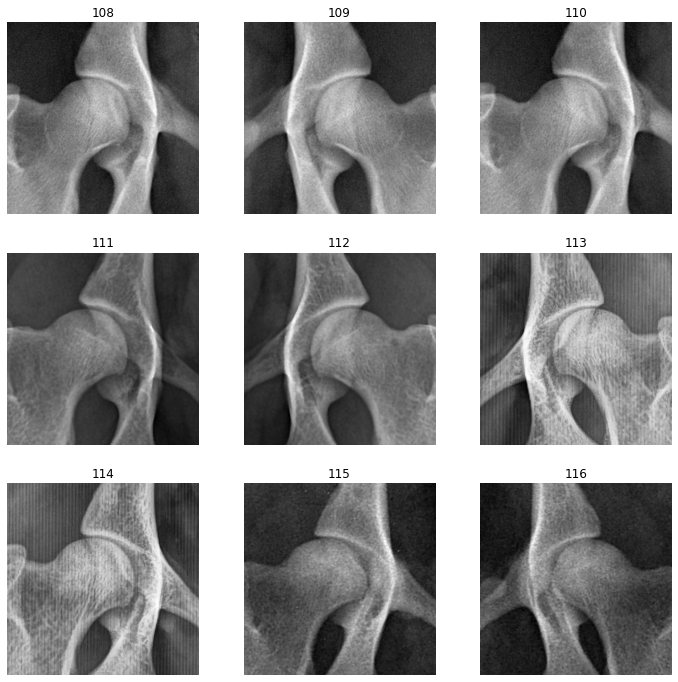

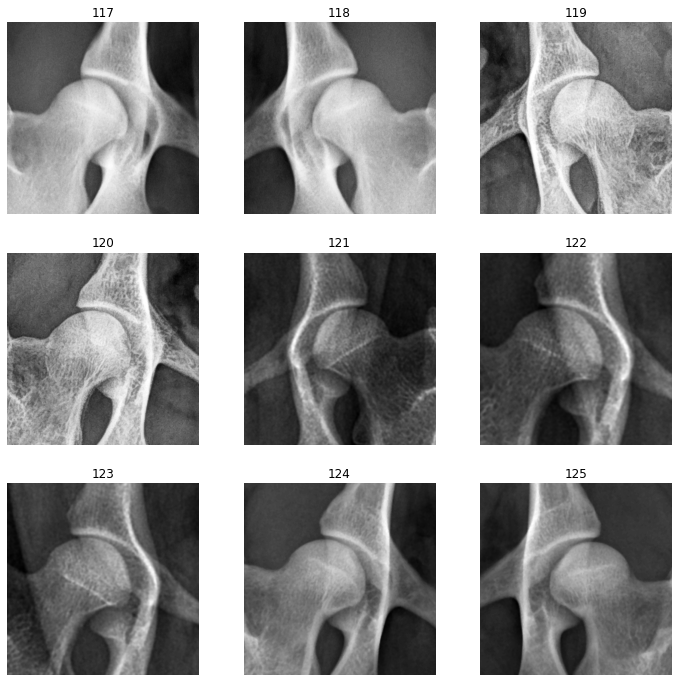

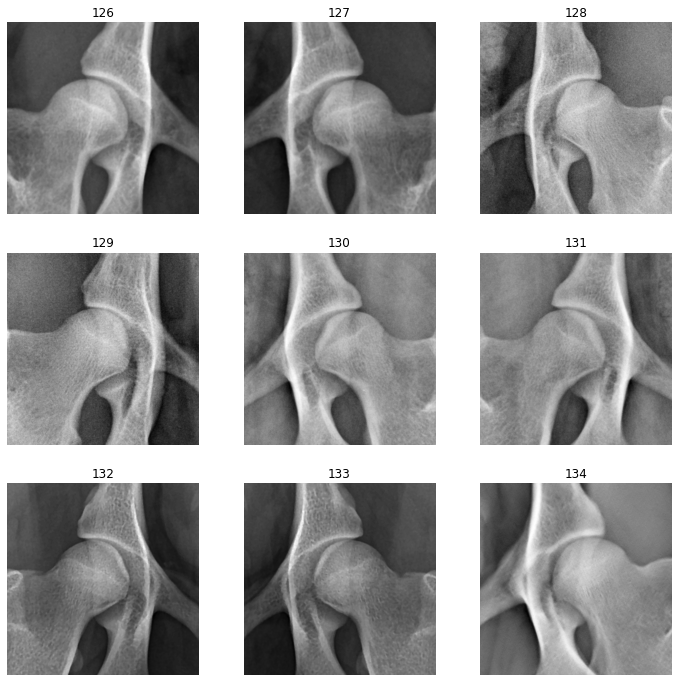

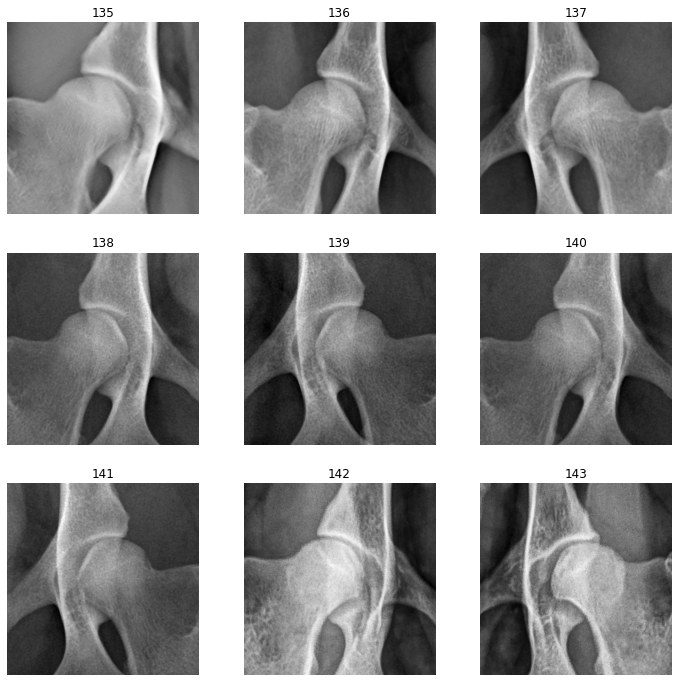

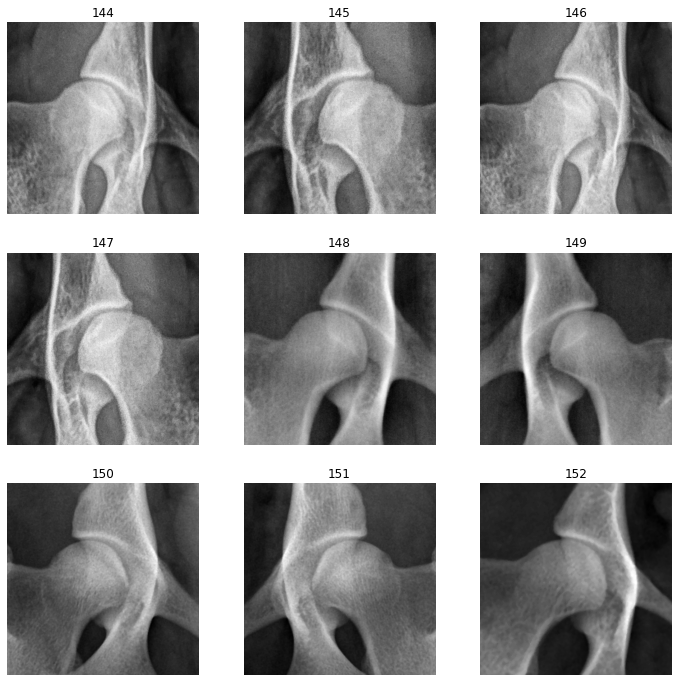

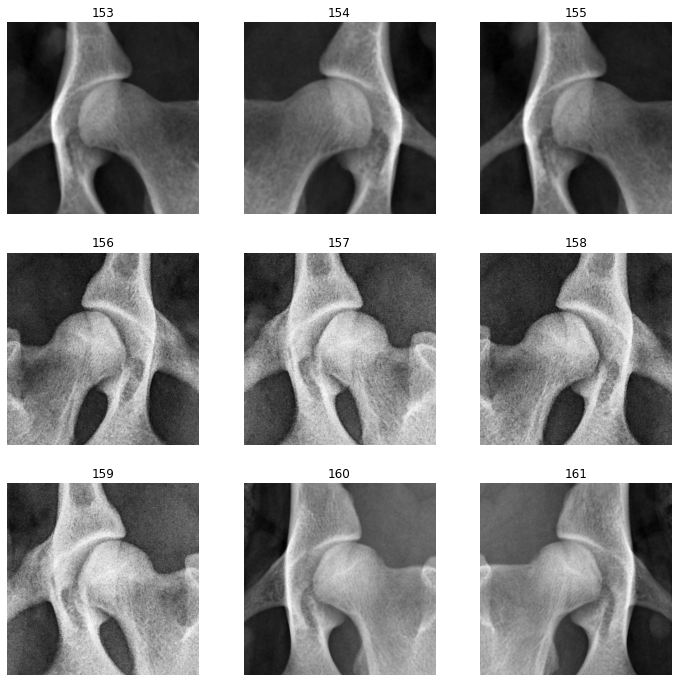

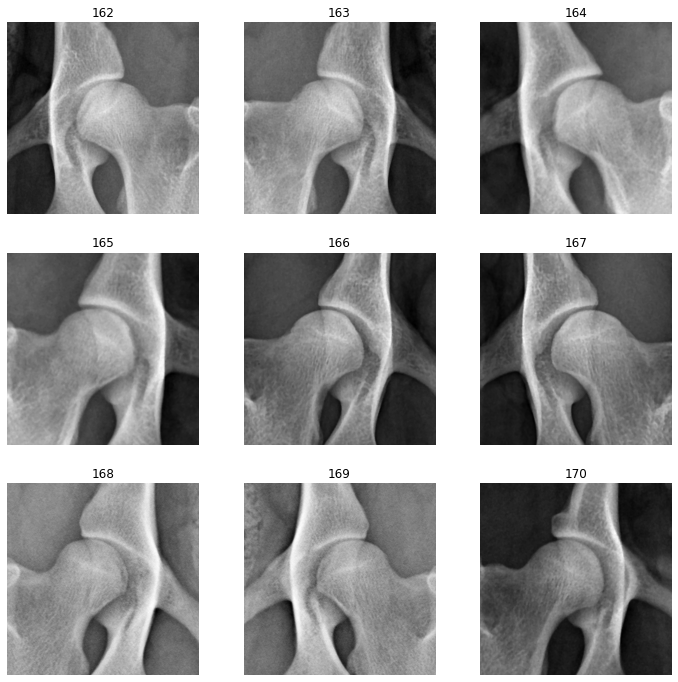

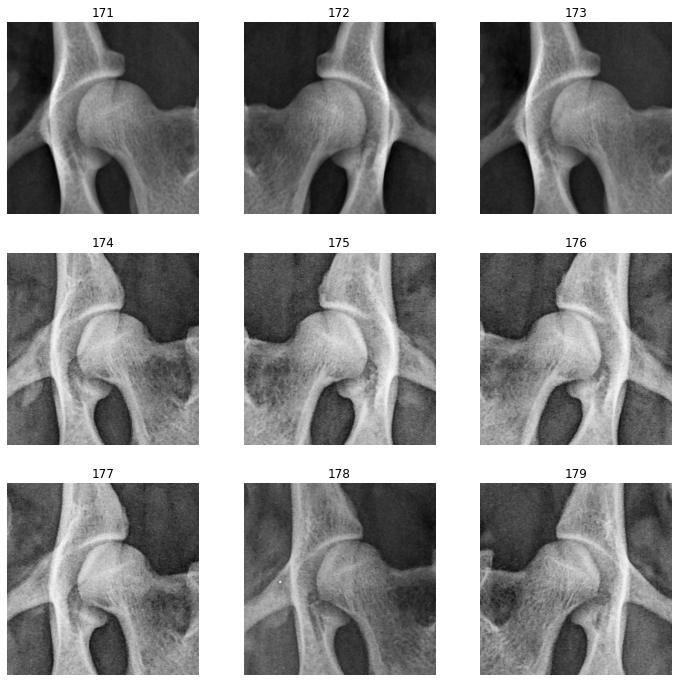

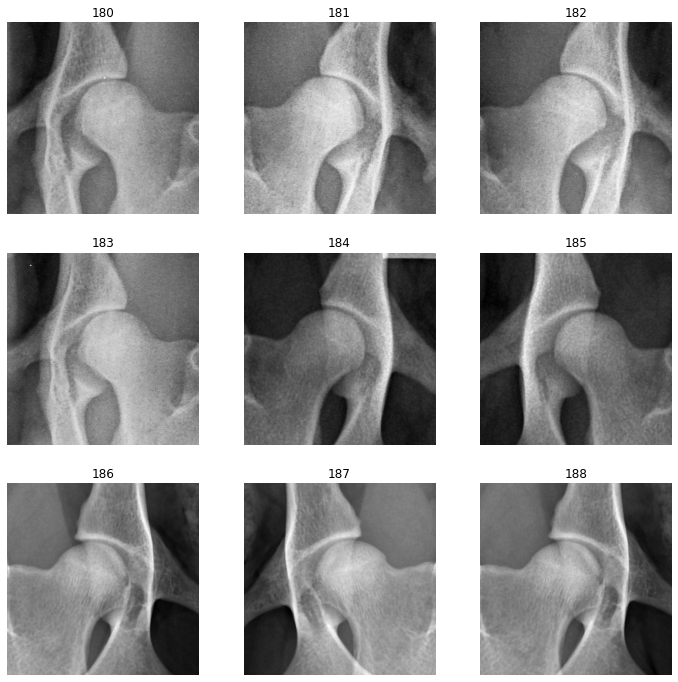

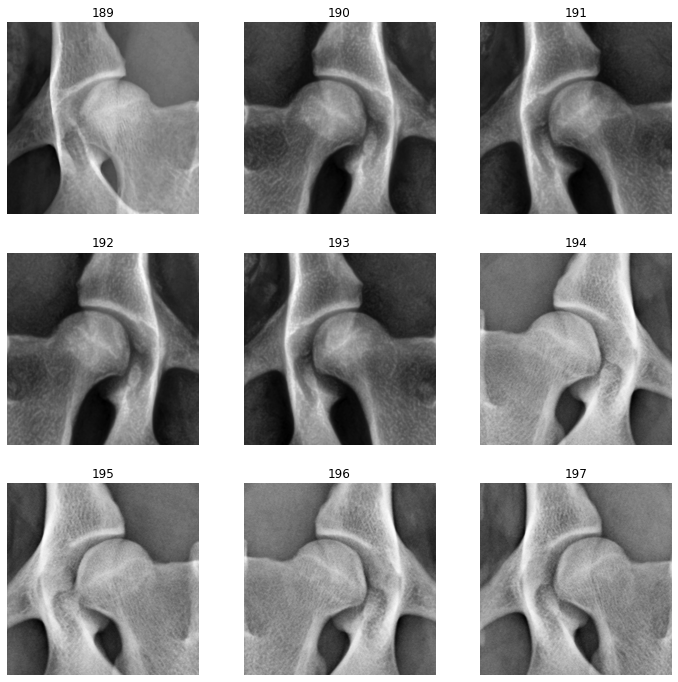

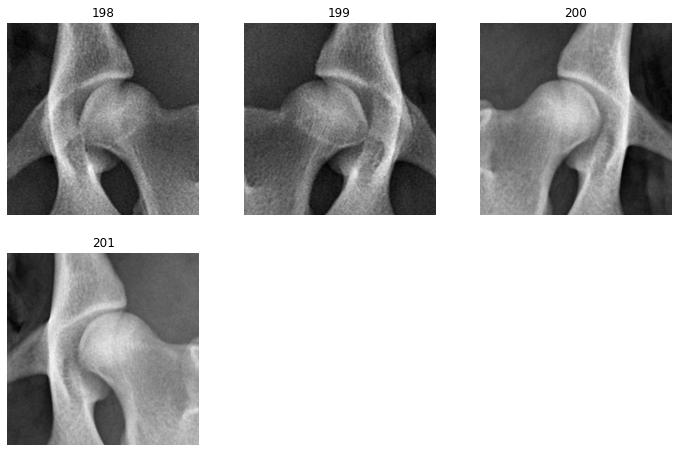

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = [83, 84, 85, 86]
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = [32] # just to make all hips are in the right direction
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 3/CC   
1    P:/CoxaAI/Sortering 3/CC   
2    P:/CoxaAI/Sortering 3/CC   
3    P:/CoxaAI/Sortering 3/CC   
4    P:/CoxaAI/Sortering 3/CC   
..                        ...   
197  P:/CoxaAI/Sortering 3/CC   
198  P:/CoxaAI/Sortering 3/CC   
199  P:/CoxaAI/Sortering 3/CC   
200  P:/CoxaAI/Sortering 3/CC   
201  P:/CoxaAI/Sortering 3/CC   

                                              filename parent_name  \
0             1.2.276.0.95.32501.20230203.134410.0.dcm  1-22113830   
1             1.2.276.0.95.32501.20230203.134410.0.dcm  1-22113830   
2             1.2.276.0.95.32501.20230203.135450.0.dcm  1-22113830   
3             1.2.276.0.95.32501.20230203.135450.0.dcm  1-22113830   
4    1.2.276.0.95.32373.1.20230202.124935.0.2.4076.dcm  1-22115512   
..                                                 ...         ...   
197  1.2.392.200036.9107.500.220.18951.20230210.112...  1-23014334   
198  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...  1-23014508   
199  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...  1-23014508   
200  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...  1-23014524   
201  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...  1-23014524   

                                             crop_name  ax0_min  ax0_max  \
0          1.2.276.0.95.32501.20230203.134410.0.dcm_h1     1979     2151   
1          1.2.276.0.95.32501.20230203.134410.0.dcm_h2     2004     2176   
2          1.2.276.0.95.32501.20230203.135450.0.dcm_h1      826     1010   
3          1.2.276.0.95.32501.20230203.135450.0.dcm_h2      845     1031   
4    1.2.276.0.95.32373.1.20230202.124935.0.2.4076....      746      906   
..                                                 ...      ...      ...   
197  1.2.392.200036.9107.500.220.18951.20230210.112...      613      770   
198  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...     1119     1307   
199  1.3.6.1.4.1.19179.1.110875144161141247.3.28037...     1106     1293   
200  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...     1349     1537   
201  1.2.276.0.95.31933.1.20230213.104919.0.2.23237...     1381     1564   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0       1245     1366    0.995571       False          2            CC   
1       1881     2007    0.990111       False          2            CC   
2       1250     1382    0.996939       False          2            CC   
3       1879     2013    0.969988       False          2            CC   
4        661      773    0.952573       False          2            CC   
..       ...      ...         ...         ...        ...           ...   
197     1232     1348    0.929935       False          2            CC   
198     1475     1615    0.949998       False          2            CC   
199      806      940    0.886035       False          2            CC   
200     1010     1145    0.999443       False          2            CC   
201     1671     1803    0.996741       False          2            CC   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
197    False  
198    False  
199    False  
200    False  
201    False  

[201 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(201, 13)


In [13]:
new_detection_df.to_csv(filename_clean, index=False)

In [14]:
detection_df[detection_df.index.isin(remove_indice)]

base_path  \
32  P:/CoxaAI/Sortering 3/CC   

                                             filename parent_name  \
32  1.2.276.0.95.33780.1.20230201.105741.0.2.5050.dcm  1-23007734   

                                            crop_name  ax0_min  ax0_max  \
32  1.2.276.0.95.33780.1.20230201.105741.0.2.5050....     1150     1246   

    ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  flipped  
32     1115     1194    0.318466       False          2            CC    False